In [1]:
import colorsys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import scipy.stats
import seaborn as sns

In [2]:
files_s = sorted(glob.glob('../optimization/output/*_embedded_pos.csv'))
img_s = sorted(glob.glob('../colors/output/img/*.png'))

In [3]:
emb_s = []
for i in range(len(files_s)):
    emb = pd.read_csv(files_s[i]).values
    emb_s.append(emb)
emb_s = np.array(emb_s)
print(emb_s.shape)

(13, 20, 3)


In [4]:
colors_rgb = []
for filename in img_s:
    img = np.array(Image.open(filename)) / 256.0
    colors_rgb.append(img[200, 150, :3])
colors_rgb = np.array(colors_rgb)
print(colors_rgb)

[[0.12890625 0.03125    0.1640625 ]
 [0.         0.1171875  0.171875  ]
 [0.6171875  0.82421875 0.8515625 ]
 [0.62890625 0.4453125  0.        ]
 [0.99609375 0.74609375 0.76171875]
 [0.63671875 0.3046875  0.94140625]
 [0.234375   0.         0.        ]
 [0.26953125 0.390625   0.5       ]
 [0.69921875 0.1796875  0.23828125]
 [0.99609375 0.6015625  0.671875  ]
 [0.         0.19921875 0.4140625 ]
 [0.67578125 0.         0.99609375]
 [0.4140625  0.7109375  0.92578125]
 [0.69140625 0.21484375 0.        ]
 [0.99609375 0.58203125 0.        ]
 [0.234375   0.29296875 0.2734375 ]
 [0.83984375 0.79296875 0.484375  ]
 [0.4140625  0.23828125 0.078125  ]
 [0.421875   0.48828125 0.5390625 ]
 [0.         0.890625   0.98046875]]


#### Components for HSV

In [5]:
hue_s, saturation_s, value_s = [], [], []
for i in range(len(colors_rgb)):
    (r, g, b) = colors_rgb[i]
    (h, s, v) = colorsys.rgb_to_hsv(r, g, b)
    hue_s.append(h)
    saturation_s.append(s)
    value_s.append(v)
hue_s = np.array(hue_s)
saturation_s = np.array(saturation_s)
value_s = np.array(value_s)

In [6]:
hue_hsv_corr_s, saturation_hsv_corr_s, value_hsv_corr_s = [], [], []
for i in range(len(emb_s)):
    for j in range(3):
        hue_corr = scipy.stats.pearsonr(emb_s[i, :, j], hue_s)[0]
        sat_corr = scipy.stats.pearsonr(emb_s[i, :, j], saturation_s)[0]
        val_corr = scipy.stats.pearsonr(emb_s[i, :, j], value_s)[0]
        if j == 0:
            hue_corr_max = hue_corr
            sat_corr_max = sat_corr
            val_corr_max = val_corr
        else:
            if np.abs(hue_corr) > hue_corr_max:
                hue_corr_max = hue_corr
            if np.abs(sat_corr) > sat_corr_max:
                sat_corr_max = sat_corr
            if np.abs(val_corr) > val_corr_max:
                val_corr_max = val_corr
    hue_hsv_corr_s.append(np.abs(hue_corr_max))
    saturation_hsv_corr_s.append(np.abs(sat_corr_max))
    value_hsv_corr_s.append(np.abs(val_corr_max))

#### Components for HSL

In [7]:
hue_s, saturation_s, lightness_s = [], [], []
for i in range(len(colors_rgb)):
    (r, g, b) = colors_rgb[i]
    (h, l, s) = colorsys.rgb_to_hls(r, g, b)
    hue_s.append(h)
    saturation_s.append(s)
    lightness_s.append(l)
hue_s = np.array(hue_s)
saturation_s = np.array(saturation_s)
lightness_s = np.array(lightness_s)

In [8]:
hue_hsl_corr_s, saturation_hsl_corr_s, lightness_hsl_corr_s = [], [], []
for i in range(len(emb_s)):
    for j in range(3):
        hue_corr = scipy.stats.pearsonr(emb_s[i, :, j], hue_s)[0]
        sat_corr = scipy.stats.pearsonr(emb_s[i, :, j], saturation_s)[0]
        lig_corr = scipy.stats.pearsonr(emb_s[i, :, j], lightness_s)[0]
        if j == 0:
            hue_corr_max = hue_corr
            sat_corr_max = sat_corr
            lig_corr_max = lig_corr
        else:
            if np.abs(hue_corr) > hue_corr_max:
                hue_corr_max = hue_corr
            if np.abs(sat_corr) > sat_corr_max:
                sat_corr_max = sat_corr
            if np.abs(lig_corr) > lig_corr_max:
                lig_corr_max = lig_corr
    hue_hsl_corr_s.append(np.abs(hue_corr_max))
    saturation_hsl_corr_s.append(np.abs(sat_corr_max))
    lightness_hsl_corr_s.append(np.abs(lig_corr_max))

#### Correlation

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

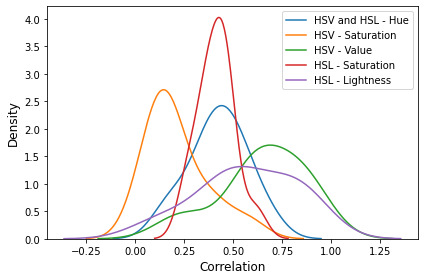

In [9]:
sns.distplot(hue_hsv_corr_s, label='HSV and HSL - Hue', hist=False)
sns.distplot(saturation_hsv_corr_s, label='HSV - Saturation', hist=False)
sns.distplot(value_hsv_corr_s, label='HSV - Value', hist=False)
sns.distplot(saturation_hsl_corr_s, label='HSL - Saturation', hist=False)
sns.distplot(lightness_hsl_corr_s, label='HSL - Lightness', hist=False)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('output/fig/correlation.png', dpi=100)

#### Paired t-test

In [10]:
print(f'HSV Value and HSV Hue:        {scipy.stats.ttest_rel(value_hsv_corr_s, hue_hsv_corr_s)}')
print(f'HSV Value and HSV Saturation: {scipy.stats.ttest_rel(value_hsv_corr_s, saturation_hsv_corr_s)}')
print(f'HSV Value and HSL Hue:        {scipy.stats.ttest_rel(value_hsv_corr_s, hue_hsl_corr_s)}')
print(f'HSV Value and HSL Saturation: {scipy.stats.ttest_rel(value_hsv_corr_s, saturation_hsl_corr_s)}')
print(f'HSV Value and HSL Lightness:  {scipy.stats.ttest_rel(value_hsv_corr_s, lightness_hsl_corr_s)}')

HSV Value and HSV Hue:        Ttest_relResult(statistic=3.7845788108705856, pvalue=0.0026018006762847665)
HSV Value and HSV Saturation: Ttest_relResult(statistic=5.350977041920262, pvalue=0.00017333276002577485)
HSV Value and HSL Hue:        Ttest_relResult(statistic=3.7845788108705856, pvalue=0.0026018006762847665)
HSV Value and HSL Saturation: Ttest_relResult(statistic=2.871482872745382, pvalue=0.014051065275193514)
HSV Value and HSL Lightness:  Ttest_relResult(statistic=3.937656920694959, pvalue=0.001971225374932004)


In [11]:
print(f'HSL Lightness and HSV Hue:        {scipy.stats.ttest_rel(lightness_hsl_corr_s, hue_hsv_corr_s)}')
print(f'HSL Lightness and HSV Saturation: {scipy.stats.ttest_rel(lightness_hsl_corr_s, saturation_hsv_corr_s)}')
print(f'HSL Lightness and HSV Value:      {scipy.stats.ttest_rel(lightness_hsl_corr_s, value_hsv_corr_s)}')
print(f'HSL Lightness and HSL Hue:        {scipy.stats.ttest_rel(lightness_hsl_corr_s, hue_hsl_corr_s)}')
print(f'HSL Lightness and HSL Saturation: {scipy.stats.ttest_rel(lightness_hsl_corr_s, saturation_hsl_corr_s)}')

HSL Lightness and HSV Hue:        Ttest_relResult(statistic=2.3752980496368385, pvalue=0.03506169447657167)
HSL Lightness and HSV Saturation: Ttest_relResult(statistic=4.064986828561951, pvalue=0.0015676277276718833)
HSL Lightness and HSV Value:      Ttest_relResult(statistic=-3.937656920694959, pvalue=0.001971225374932004)
HSL Lightness and HSL Hue:        Ttest_relResult(statistic=2.3752980496368385, pvalue=0.03506169447657167)
HSL Lightness and HSL Saturation: Ttest_relResult(statistic=1.7014967149195461, pvalue=0.11459250830395919)
